see https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
from __future__ import print_function, division
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',
               activity_regularizer=regularizers.l1(1e-7))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using Theano backend.


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='mse')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s - loss: 0.1387 - val_loss: 0.0749
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.0728 - val_loss: 0.0716
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.0706 - val_loss: 0.0695
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.0682 - val_loss: 0.0666
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.0650 - val_loss: 0.0631
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.0617 - val_loss: 0.0598
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.0587 - val_loss: 0.0570
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.0562 - val_loss: 0.0547
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.0540 - val_loss: 0.0526
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.0521 - val_loss: 0.0509

In [19]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

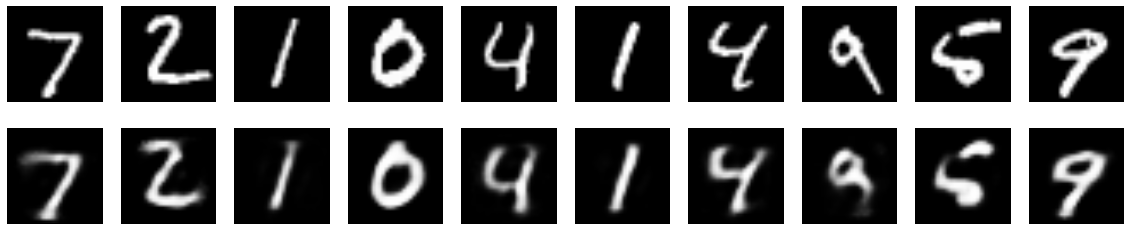

In [20]:
# use Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
nsamples = 8
nhidden = 32
random_hidden = np.random.randn(nsamples, nhidden)
# random_hidden = np.zeros((nsamples, nhidden))
# random_hidden[np.arange(nsamples),np.random.randint(0,nhidden, size=(nsamples))] = 5.0
# onehot
decoded_imgs = decoder.predict(random_hidden)

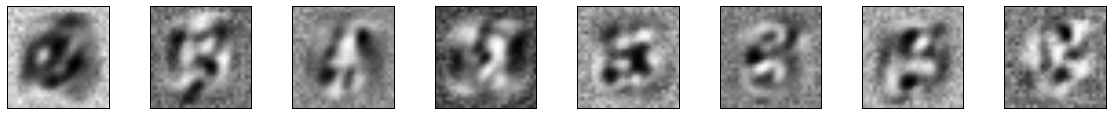

In [22]:
n = nsamples  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()